<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [1]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the flower_types dataset and print the first five observations

In [2]:
# type your code here
df=pd.read_csv(r'flower_types.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
f_type=pd.get_dummies(df['class'])
f_type

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
df['sepal width'].isna().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

skewness coefficient for sepal_length is  0.3149109566369728


C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


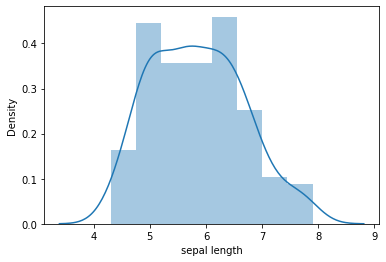

In [6]:
# type your code here
print('skewness coefficient for sepal_length is ',df['sepal length'].skew())
sns.distplot(df['sepal length'])
plt.show()

* sepel length is slightely right skewed one the best soution is use squareroot transformation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

<AxesSubplot:>

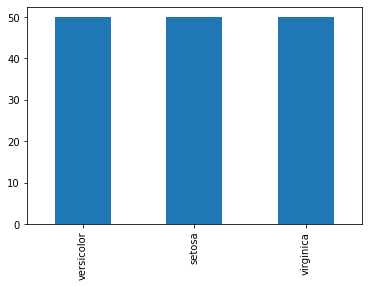

In [5]:
df['class'].value_counts().plot(kind='bar')

* Frequency of all species is same


* No, because the frequency of flowers is not going to affect the dataset or model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
print(df['petal width'].min(),df['petal width'].max())

0.1 2.5


* No the range is not between 0 and 1

In [9]:
# type your code here
from sklearn.preprocessing import MinMaxScaler
df['scaled_p_width']=MinMaxScaler().fit_transform(df['petal width'].values.reshape(-1,1))
print(df['scaled_p_width'].min(),df['scaled_p_width'].max())

0.0 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.corr().index

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'scaled_p_width'],
      dtype='object')

In [11]:
# type your code here
a=df.corr()
def cor(col):
    if col>0.8:
        return True
    else:
        return False
    return col

for i in a.columns:
    a[i]=a[i].agg(cor)
    
a

,sepal length,sepal width,petal length,petal width,scaled_p_width
sepal length,True,False,True,True,True
sepal width,False,True,False,False,False
petal length,True,False,True,True,True
petal width,True,False,True,True,True
scaled_p_width,True,False,True,True,True


In [12]:
df.corr()

,sepal length,sepal width,petal length,petal width,scaled_p_width
sepal length,1.000000,-0.109369,0.871754,0.817954,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000,1.000000
scaled_p_width,0.817954,-0.356544,0.962757,1.000000,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

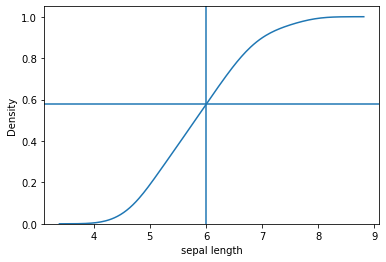

In [18]:
# type your code here
sns.kdeplot(df['sepal length'],cumulative=True)
plt.axvline(6)
plt.axhline(0.58)
plt.show()

In [20]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'scaled_p_width'],
      dtype='object')

In [24]:
round(len(df[df['sepal length']<6])/len(df),2)

0.55

* The probabilty is  0.55

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
df['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
# type your code here
df['class_label']=df['class'].replace({'setosa':0,'versicolor':1,'virginica':2})
df.head()

,sepal length,sepal width,petal length,petal width,class,scaled_p_width,class_label
0,5.1,3.5,1.4,0.2,setosa,0.041667,0
1,4.9,3.0,1.4,0.2,setosa,0.041667,0
2,4.7,3.2,1.3,0.2,setosa,0.041667,0
3,4.6,3.1,1.5,0.2,setosa,0.041667,0
4,5.0,3.6,1.4,0.2,setosa,0.041667,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


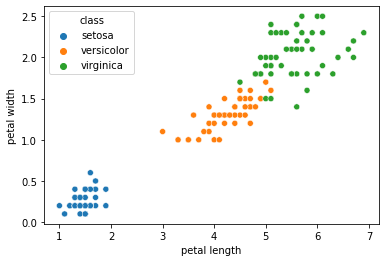

In [34]:
# type your code here
sns.scatterplot(df['petal length'],df['petal width'],hue=df['class'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

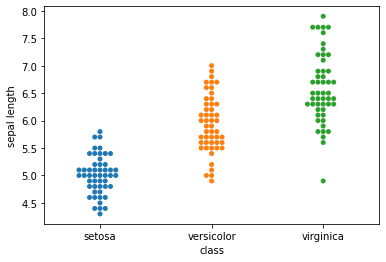

In [26]:
# type your code here
sns.swarmplot(y=df['sepal length'],data=df,x='class')
plt.show()